# Covid-19 case study analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data=[]
dates = pd.date_range(start="2020-01-01", periods=100)
regions=["Region A","Region B","Region C"]

In [20]:
for region in regions:
    confirmed=np.cumsum(np.random.poisson(10,size=100))
    recovered = confirmed - np.random.randint(0, 5, size=100)  
    deaths=np.random.randint(0,3,size=100)
    for i,date in enumerate(dates):
         data.append([date, region, confirmed[i], recovered[i], deaths[i]])
df=pd.DataFrame(data,columns=["Date","Region","Confirmed","Recoverd","Deaths"])
df["Rolling Average Confirmed"]=df.groupby("Region")["Confirmed"].transform(lambda x: x.rolling(window=7,min_periods=1).mean()
)

In [22]:
pivot_table = df.pivot_table(values="Confirmed", index="Date", columns="Region", aggfunc="mean")

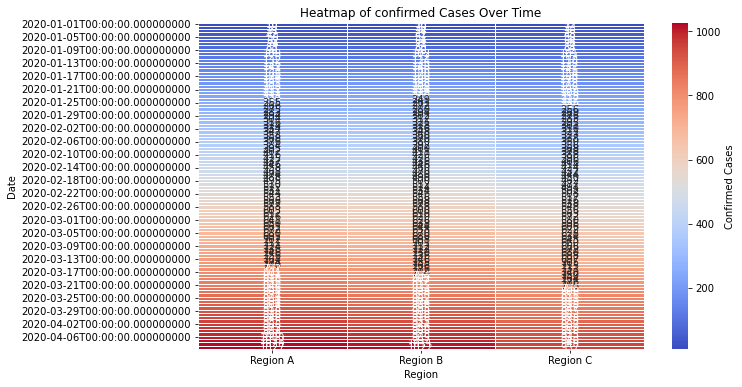

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="coolwarm", cbar_kws={'label': 'Confirmed Cases'}, annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of confirmed Cases Over Time")
plt.xlabel("Region")
plt.ylabel("Date")
plt.show()

In [35]:
df["Anomaly"]=df.groupby("Region")["Confirmed"].apply(lambda x:(x.diff().fillna(0)>30).astype(int))
                                                      

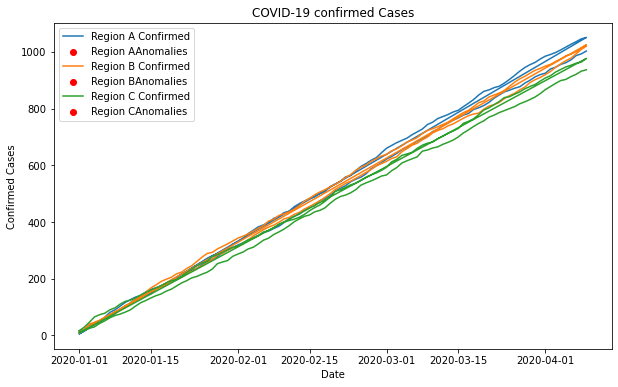

In [39]:
plt.figure(figsize=(10,6))
for region in regions:
    regional_data=df[df["Region"]== region]
    plt.plot(regional_data["Date"],regional_data["Confirmed"],label=f"{region} Confirmed")
    anomalies=regional_data[regional_data["Anomaly"]==1]
    plt.scatter(anomalies["Date"],anomalies["Confirmed"],color="red",label=f"{region}Anomalies")
plt.title("COVID-19 confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()